<a href="https://colab.research.google.com/github/Lalortiz34/IntArt-y-RedNeu/blob/main/Producto_Integrador_de_Aprendizaje_Equipo_10_007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Producto Integrador de Aprendizaje**

Inteligencia Articifial y Redes Neuronales

Entrenamiento de una Red Neuronal Convolusional

**Integrantes:**

Eduardo Ortiz Lerma-2077546-IMTC

César Daniel Cruz Maldonado-1970485-IMTC

Pablo de Jesús Villafaña Domínguez-2077623-IMTC

Ikzury Macartina Camacho Arvizu-2077920-IMTC



Importar librerías

In [99]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

Datos de la red

In [5]:
#Colocar los datos en la forma correcta
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#Hacer 'one-hot encoding' de los resultados 
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

Importar Imágenes

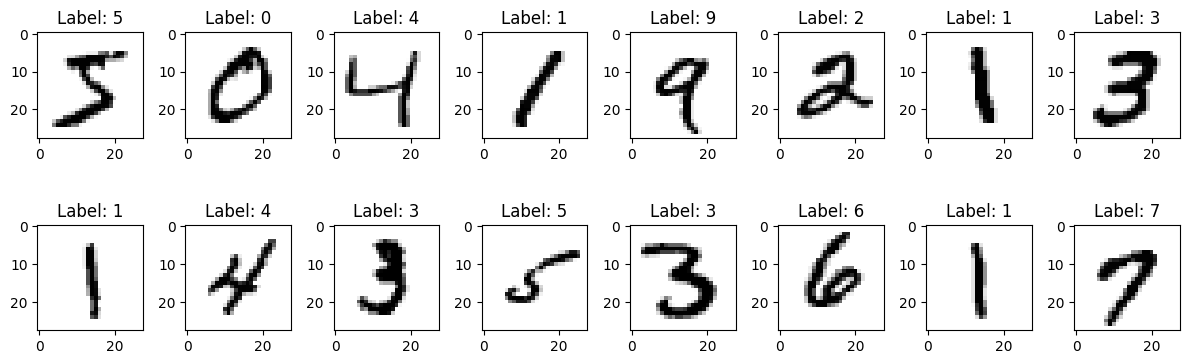

In [6]:
  #Codigo para mostrar imagenes del set
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

Aumento de Datos

In [7]:
#Aumento de datos
#Variables para controlar las transformaciones que se haran en el aumento de datos
#utilizando ImageDataGenerator de keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25
#rango_inclinacion=15 !
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion 
)

datagen.fit(X_entrenamiento)

Importar Imágenes

ANTES:



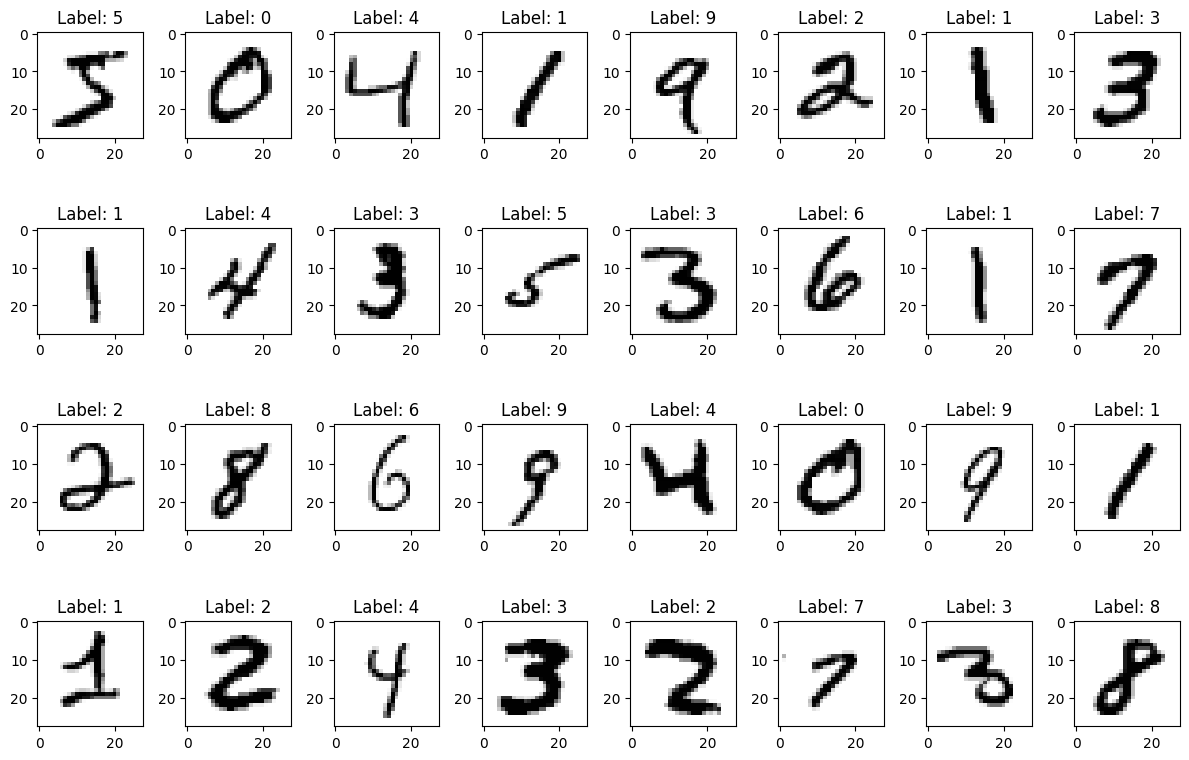

DESPUES:



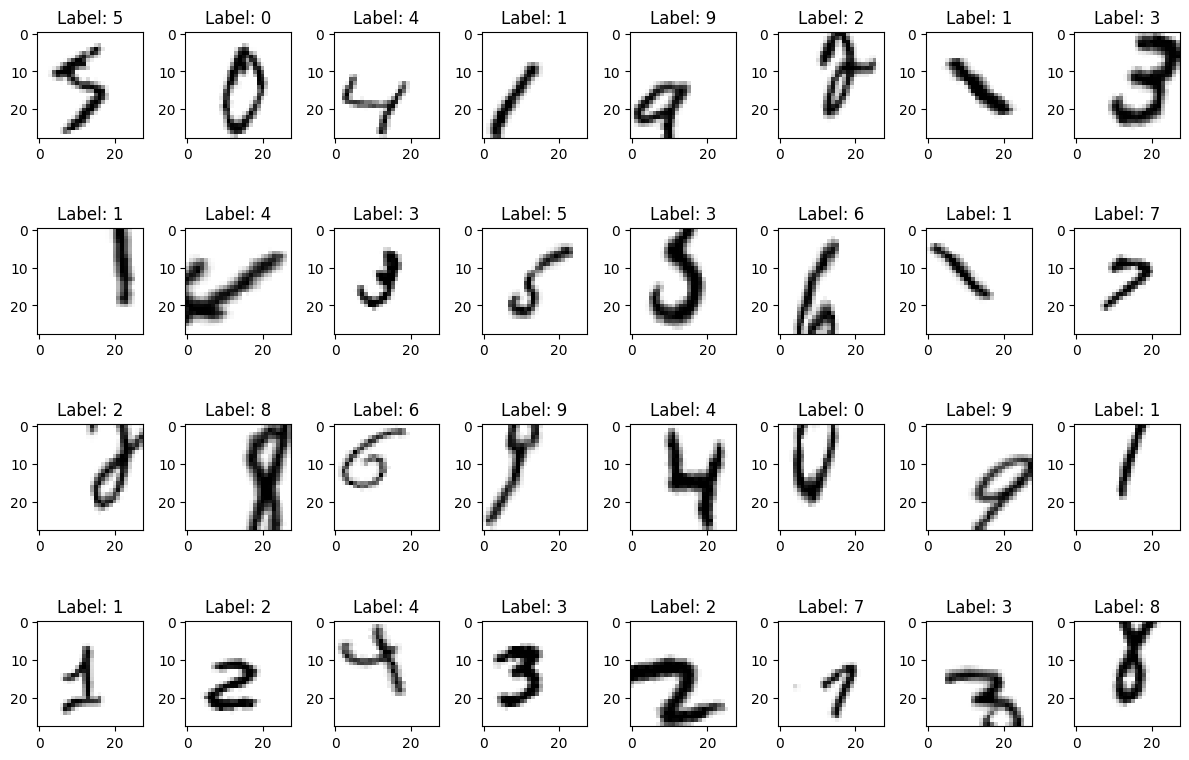

In [8]:
#Codigo para mostrar imagenes del set
filas = 4
columnas = 8
num = filas*columnas
print('ANTES:\n')
fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes1[i//columnas, i%columnas]
     ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
plt.tight_layout()
plt.show()
print('DESPUES:\n')
fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//columnas, i%columnas]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
     break
plt.tight_layout()
plt.show()

In [9]:
#Modelo!
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
#Los datos para entrenar saldran del datagen
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

Entrenamiento del Modelo

In [11]:
TAMANO_LOTE = 32

#Entrenar la red
print("Entrenando modelo...");
epocas=10
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 1.1838 - accuracy: 0.6012 - val_loss: 0.1514 - val_accuracy: 0.9622
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.6879 - accuracy: 0.7794 - val_loss: 0.1161 - val_accuracy: 0.9658
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.5707 - accuracy: 0.8162 - val_loss: 0.0840 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.5231 - accuracy: 0.8321 - val_loss: 0.0912 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4809 - accuracy: 0.8439 - val_loss: 0.0832 - val_accuracy: 0.9706
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.4553 - accuracy: 0.8523 - val_loss: 0.0916 - val_accuracy: 0.9689
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.4323 - accuracy: 0.8607

Gráfica de Precisión

313/313 - 2s - loss: 0.0514 - accuracy: 0.9829 - 2s/epoch - 5ms/step


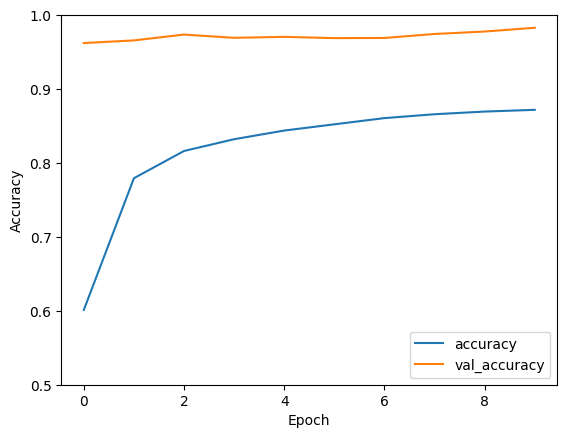

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = modelo.evaluate(X_pruebas, Y_pruebas, verbose=2)

Predicciones del Modelo

In [57]:
predictions = modelo.predict(X_pruebas)

313/313 [==============================] - 2s 5ms/step


In [58]:
np.argmax(predictions[0])

7

In [59]:
Y_pruebas[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [98]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Y_pruebas[predicted_label],
                                100*np.max(predictions_array),
                                Y_pruebas[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Imagen de Prueba

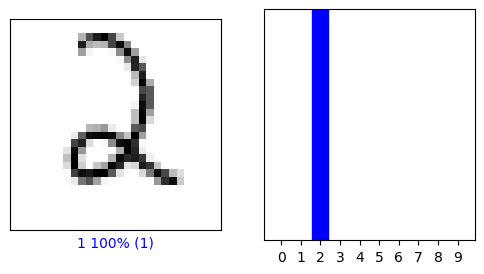

In [100]:
i = 47
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], Y_pruebas, X_pruebas)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  Y_pruebas)
plt.show()

Predicciones del resto de imagenes

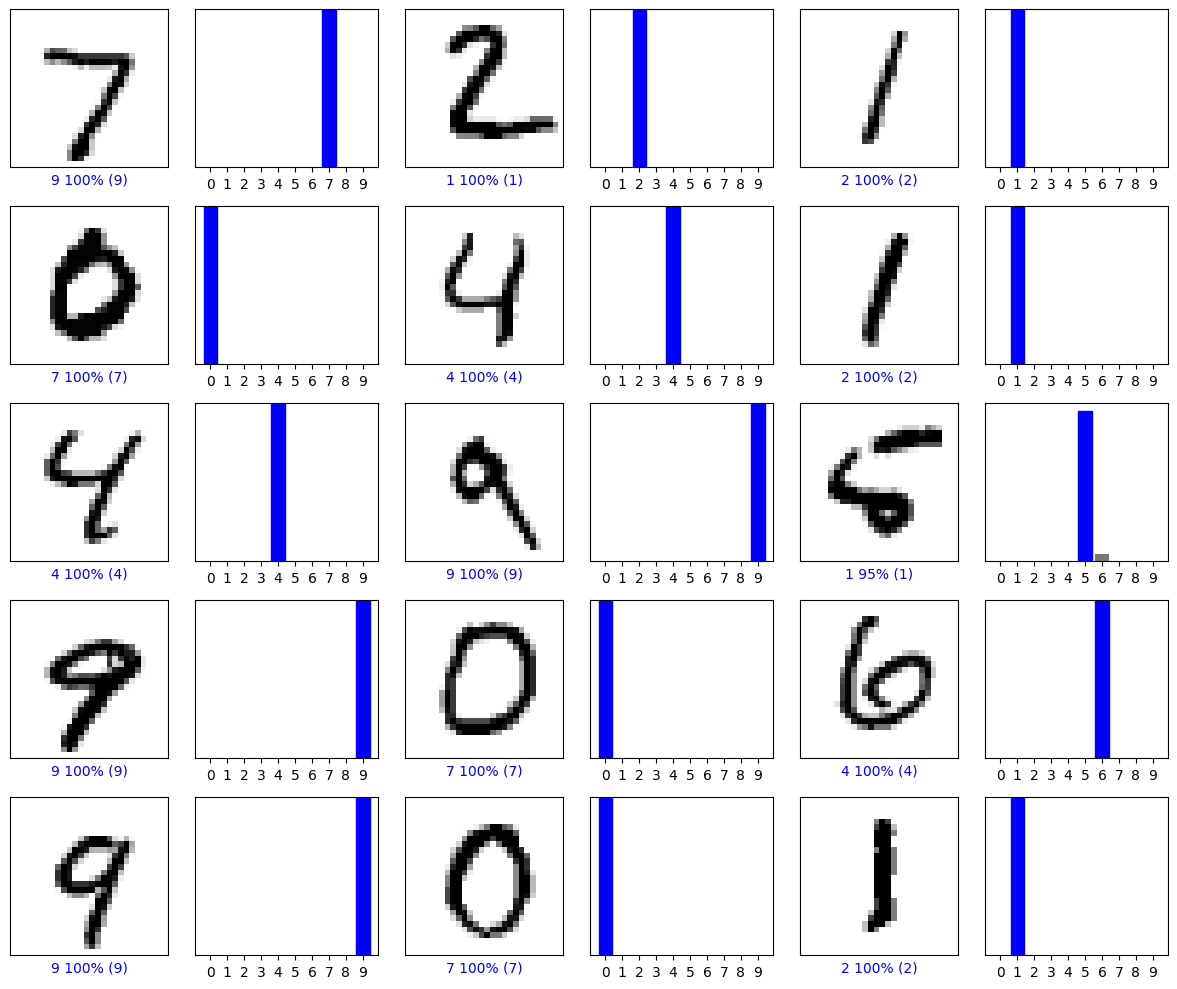

In [101]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], Y_pruebas, X_pruebas)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], Y_pruebas)
plt.tight_layout()
plt.show()

Predicción Singular

In [93]:
#Tome una imagen del conjunto de datos de prueba.
img = X_pruebas[1]

print(img.shape)

(28, 28, 1)


In [94]:
#Agregue la imagen a un lote donde sea el único miembro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [95]:
predictions_single = modelo.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 17ms/step
[[3.5596865e-03 7.3929857e-07 9.9568838e-01 7.2370988e-04 6.3923440e-09
  1.3779353e-06 8.6454679e-07 2.2754773e-05 2.4383746e-06 7.2487953e-09]]


In [134]:
np.argmax(predictions_single[0])

2

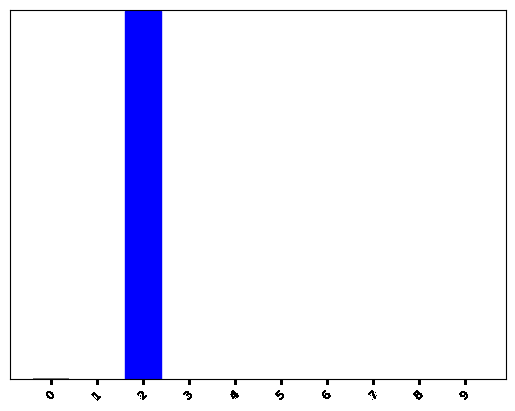

In [154]:
plot_value_array(1, predictions_single[0], Y_pruebas)
_ = plt.xticks(Y_pruebas, rotation=45, fontsize=8)